In [1]:
# n_estimators:[100,150,200,250,300,350,400]：决策树的个数，越多越好，但是性能就会越差，至少100左右（具体数字忘记从哪里来的了）可以达到可接受的性能和误差率。 
# criterion: ["gini","entropy"](default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
# max_features: ["auto","sqrt","log2","None"]
# traindata_rate=[0.7,0.8,0.9]
n_estimators=[100,150,200,250,300,350,400]
criterion=["gini","entropy"]
max_features=["auto","sqrt","log2"]
traindata_rate=[0.7,0.8,0.9]

# Fitness Function

In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation, ensemble, preprocessing, metrics

def create_chromsom_value_X(filename):
    chromosom_value_X=[]
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    for index in range(0,len(col_list)-1):
        chromosom_value_X.append([0,1])
    return chromosom_value_X

def create_chromsom_value_all(filename):
    chromosom_value=create_chromsom_value_X(filename)
    chromosom_value.append(n_estimators)
    chromosom_value.append(criterion)
    chromosom_value.append(max_features)
    chromosom_value.append(traindata_rate)
    return chromosom_value

def create_x_tmp(ETF_train,col_list,chromosome):
    x_tmp=[]
    for index in range(0,len(col_list)-1):
        if chromosome[index] ==1:
            x_tmp.append(ETF_train[col_list[index]])
    return x_tmp

def random_forest_model(filename,chromsome):
    # 載入資料
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    n_estimators_c=chromsome[len(col_list)-1]
    criterion_c=chromsome[len(col_list)+0]
    max_features_c=chromsome[len(col_list)+1]
    traindata_rate=chromsome[len(col_list)+2]

    # 建立訓練與測試資料
    x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
    ETF_X = pd.DataFrame(x_tmp).T
    ETF_Y = ETF_train["Y"]

    train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
    test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
    train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
    test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

    # 建立 random forest 模型
    forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
    forest_fit = forest.fit(train_X, train_Y)

    # 預測
    test_y_predicted = forest.predict(test_X)

    # 績效
    accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
    return accuracy


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# GA Function

In [4]:
filename='featured/0053_01.csv'
chromosom_value=create_chromsom_value_all(filename)

import random
def createrandomList(create_number,category):
    list_random = [ random.randint(0,category) for i in range(create_number)]
    return(list_random)

#init create population chromosome(100)--function input：filename & population, output：population_list 
def create_population(population):
    population_list=[]
    for popu in range(population):
        chromosome_create=[]
        for index in chromosom_value:
            chromosome_create.append(index[createrandomList(1,len(index)-1)[0]]) #從chromosom_value隨機產生一個值塞到
        population_list.append(chromosome_create)
    return population_list

def cross(cross_rate,chromosome_1,chromosome_2):
    random_rate=random.random()
    if(random_rate>cross_rate):
        point_1=random.randint(0,len(chromosome_1)-1)
        point_2=random.randint(0,len(chromosome_1)-1)

        while(point_1>=point_2):
            point_1=random.randint(0,len(chromosome_1)-1)
            point_2=random.randint(0,len(chromosome_1)-1)

#         print("cross_point1: "+str(point_1))
#         print("cross_point2: "+str(point_2))
#         print("cross_len_chromosome_1= "+str(len(chromosome_1)))
#         print("cross_len_chromosome_2= "+str(len(chromosome_2)))

        tmp=0
        for index in range(point_1,point_2+1):
            tmp=chromosome_1[index]
            chromosome_1[index]=chromosome_2[index]
            chromosome_2[index]=tmp
    return chromosome_1

def mutation(mutation_rate,chromosome):
    random_rate=random.random()
    if(random_rate>mutation_rate):
#         print("mutation_start")
        point_1=random.randint(0,len(chromosome)-1)#產生二個隨機point1 & point2 為了到時候mutation
        point_2=random.randint(0,len(chromosome)-1)
        while(point_1==point_2):#如果point1 point2 一樣要重新產生
            point_1=random.randint(0,len(chromosome)-1)
            point_2=random.randint(0,len(chromosome)-1)
#         print("mu_point1= "+str(point_1))
#         print("mu_point2= "+str(point_2))

        tmp=chromosome[point_1]#改變染色體中第point1的值，如果產生的新值與舊的一樣要再重新產生
        #chromosome[point_1]值等於chromosom_value裡面隨機產生的一個值createrandomList(1,len(chromosom_value[point_1])-1)[0]
        chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]#
        while(tmp==chromosome[point_1]):
            chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]

        tmp_2=chromosome[point_2]#改變染色體中第point2的值，如果產生的新值與舊的一樣要再重新產生
        chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
        while(tmp_2==chromosome[point_2]):
            chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
    return chromosome

def calculateY_rank(rank_number,population_list,filename):
    result_all_x_fitness=[]#記錄所有population與產生的y
    best_result=[]#記錄最好的population&y

    for index in population_list:
        fitness_value=random_forest_model(filename,index)#calculate fintness_value
        result_all_x_fitness.append([fitness_value,index])
    
    result_rank=[]#record before rank"s x & fitness_value
    for index in range(0,rank_number):
        result_rank.append(sorted(result_all_x_fitness,reverse=True)[index])#sort:big->small
    best_result=result_rank[0]
    
    x_final=[]#記錄前十五名的染色體
    for index in result_rank:
        x_final.append(index[1])
    return [x_final,best_result]

#產生新的X(上一代最好的前15個交配+突變產生新的15個+隨機產生85個新的x)--function
def create_new_x(rank_number,population,cross_rate,mutation_rate,x_final):
    new_x=[]
    #先把前15名的染色體做交配&突變->產生新15個染色體
    for index in range(0,rank_number):
        other_ch=createrandomList(1,rank_number-1)[0]
        while(index==other_ch):
            other_ch=createrandomList(1,rank_number-1)[0] #變矩陣要減1 if index= other_ch -> create other_ch again
#         print("i_th chromosome: "+str(index))
#         print("other_random_chromosome: "+str(other_ch))
        cross_result=cross(cross_rate,x_final[index],x_final[other_ch])
        new_x.append(mutation(mutation_rate,cross_result))

    #隨機產生第16~100的染色體
    for index in range(0,population-rank_number):
        new_x.append(create_population(1)[0])
    return new_x

In [5]:
#GA + regression ->main
print(filename)
import datetime
#init parameter
#filename='0051_random.csv'
iteration=60
iteration_now=0
population=100
rank_number=10

cross_rate=0.3
mutation_rate=0.3

y_target=20000#fitnessvalue的目標，到達就停止迭代
y_best=-1#目前為止(所有迭代中)最好的fitnessvalue
y_now=-1#當前此迭代中最好的fitnessvalue
x_best=[]
y_best_everyiteration=[]

population_list=create_population(population)#產生初始母體染色體

Totalstarttime=datetime.datetime.now()
print("Start GA: "+str(Totalstarttime))
while(not(iteration_now>=iteration or y_best>y_target)):
    iteration_now=iteration_now+1
    print("\niteration_now= "+str(iteration_now))
    Y=calculateY_rank(rank_number,population_list,filename) #return X_final(前15名的染色體) & best_result(此代最好的fitness跟染色體)
    y_now=Y[1][0]
    print("y_now= "+str(y_now))
    if y_now>y_best:
        y_best=y_now
        x_best=Y[1][1]
        #print("x_best= "+str(x_best))
    print("y_best= "+str(y_best))
    y_best_everyiteration.append(y_best)
    population_list=create_new_x(rank_number,population,cross_rate,mutation_rate,Y[0])

print("iteration_now= "+str(iteration_now))
print("y_best= "+str(y_best))
print("x_best= "+str(x_best))

print("GA's end time is "+str(datetime.datetime.now()))
print("All time spends:  "+str(datetime.datetime.now()-Totalstarttime))


featured/0053_01.csv
Start GA: 2018-05-29 12:52:07.072097

iteration_now= 1
y_now= 0.611111111111
y_best= 0.611111111111

iteration_now= 2
y_now= 0.619047619048
y_best= 0.619047619048

iteration_now= 3
y_now= 0.595238095238
y_best= 0.619047619048

iteration_now= 4
y_now= 0.626984126984
y_best= 0.626984126984

iteration_now= 5
y_now= 0.619047619048
y_best= 0.626984126984

iteration_now= 6
y_now= 0.611111111111
y_best= 0.626984126984

iteration_now= 7
y_now= 0.603174603175
y_best= 0.626984126984

iteration_now= 8
y_now= 0.626984126984
y_best= 0.626984126984

iteration_now= 9
y_now= 0.626984126984
y_best= 0.626984126984

iteration_now= 10
y_now= 0.634920634921
y_best= 0.634920634921

iteration_now= 11
y_now= 0.626984126984
y_best= 0.634920634921

iteration_now= 12
y_now= 0.619047619048
y_best= 0.634920634921

iteration_now= 13
y_now= 0.603174603175
y_best= 0.634920634921

iteration_now= 14
y_now= 0.611111111111
y_best= 0.634920634921

iteration_now= 15
y_now= 0.611111111111
y_best= 0.6349

# 畫GA迭代圖

featured/0053_01.csv


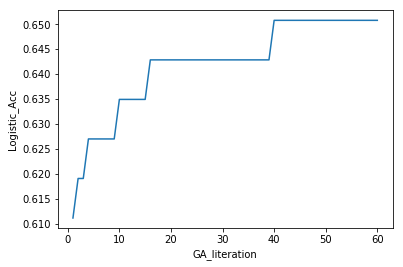

In [7]:
print(filename)
import matplotlib.pyplot as plt
plt.plot(list(range(1,iteration+1)),y_best_everyiteration)
plt.xlabel("GA_literation")
plt.ylabel("Logistic_Acc")
plt.show()

# 畫決策樹圖

In [8]:
print(filename)
#X_best=x_best= [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 100, 'entropy', 'auto', 0.9]
print(x_best)
fitness_value=random_forest_model(filename,x_best)
print(fitness_value)

featured/0053_01.csv
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 150, 'gini', 'auto', 0.9]
0.563492063492


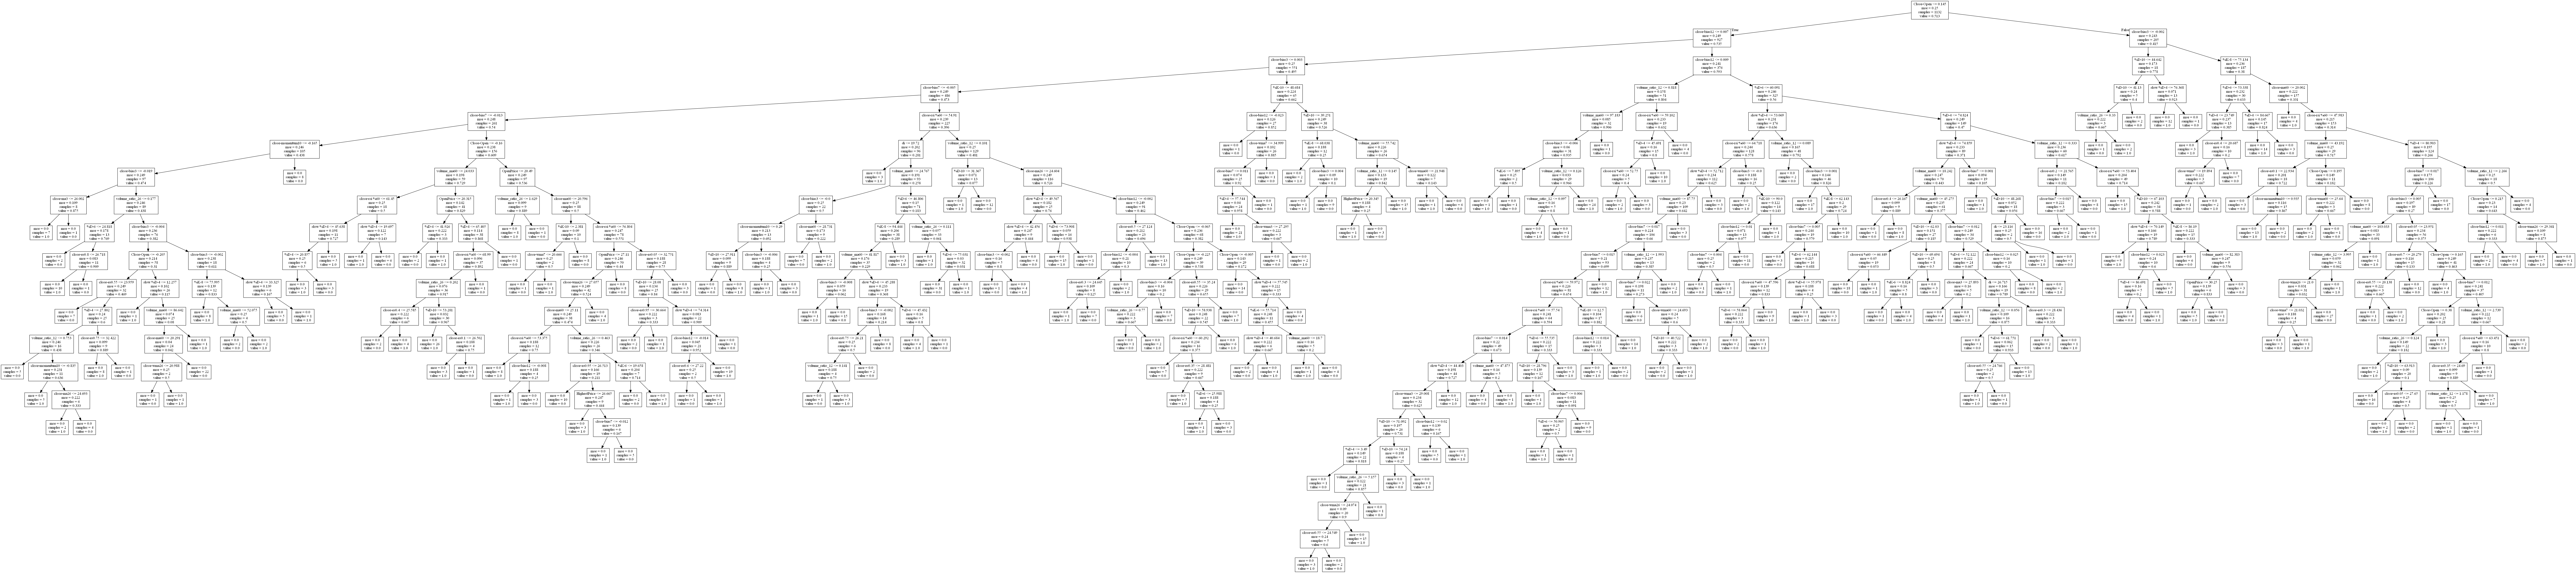

In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,export_graphviz
import pydotplus
from IPython.display import Image, display
import IPython
%matplotlib inline
import os
import sys
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

forest=DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=None)
forest.fit(train_X, train_Y)
reg_dot_data = export_graphviz(forest,out_file=None,feature_names=ETF_X.columns)
reg_graph = pydotplus.graph_from_dot_data(reg_dot_data)
graph = pydotplus.graph_from_dot_data(reg_dot_data)
conda_fix(graph)
Image(graph.create_png())
#reg_graph.write_png(graph.create_png())

# 用最好的染色體再跑一次model

In [9]:

#def random_forest_model(filename,chromsome):
chromsome=x_best
# 載入資料
ETF_train = pd.read_csv(filename)
col_list=list(ETF_train.columns)

n_estimators_c=chromsome[len(col_list)-1]
criterion_c=chromsome[len(col_list)+0]
max_features_c=chromsome[len(col_list)+1]
traindata_rate=chromsome[len(col_list)+2]

# 建立訓練與測試資料
x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
ETF_X = pd.DataFrame(x_tmp).T
ETF_Y = ETF_train["Y"]

train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = n_estimators_c,criterion=criterion_c,max_features=max_features_c)
forest.fit(train_X, train_Y)
forest_fit = forest.fit(train_X, train_Y)

# 預測
test_y_predicted = forest.predict(test_X)
print(test_y_predicted)
# 績效
accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
print(accuracy)
    #return accuracy

[1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
0.547619047619
